<h1>Model 1: Decision Trees</h1>
<p>Experimenting with Decision Tree model lookin at the DrDOS dataset sample also known as sample 1</p>

In [2]:
import pandas as pd
df = pd.read_excel("sample1_DrDOS.xlsx")
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,43435.45,28415,97,...,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,43435.45,2,2,...,0.0,0,0,0.0,0.0,0,0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,43435.45,48549,200,...,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,43435.45,48337,200,...,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,43435.45,32026,200,...,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    9999 non-null   int64  
 1   Flow ID                       9999 non-null   object 
 2    Source IP                    9999 non-null   object 
 3    Source Port                  9999 non-null   int64  
 4    Destination IP               9999 non-null   object 
 5    Destination Port             9999 non-null   int64  
 6    Protocol                     9999 non-null   int64  
 7    Timestamp                    9999 non-null   float64
 8    Flow Duration                9999 non-null   int64  
 9    Total Fwd Packets            9999 non-null   int64  
 10   Total Backward Packets       9999 non-null   int64  
 11  Total Length of Fwd Packets   9999 non-null   int64  
 12   Total Length of Bwd Packets  9999 non-null   int64  
 13   Fw

In [5]:
df.describe(include = 'all')

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
count,9999.000000,9999,9999,9999.000000,9999,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,...,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9999.0,9999.000000,9999
unique,NaN,9347,64,NaN,76,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,2
top,NaN,172.16.0.5-192.168.50.1-9553-22-6,172.16.0.5,NaN,192.168.50.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,DrDoS_DNS
freq,NaN,10,8610,NaN,8612,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9932.0,NaN,9119
mean,1568.808981,NaN,NaN,10096.430543,NaN,30363.717072,16.023202,43435.455485,1.624124e+06,125.198320,...,2.915233e+03,1.599994e+04,9.995245e+03,5.370432e+05,2.342448e+04,5.569998e+05,5.153709e+05,NaN,0.876288,NaN
std,935.031615,NaN,NaN,21287.324133,NaN,20480.333629,3.161592,0.004977,1.179062e+07,100.354114,...,8.575498e+04,2.605166e+05,1.997178e+05,5.018512e+06,5.519880e+05,5.185213e+06,4.899215e+06,NaN,0.329270,NaN
min,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,43435.450000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000,NaN
25%,768.000000,NaN,NaN,634.000000,NaN,11880.500000,17.000000,43435.450000,1.083200e+04,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000,NaN
50%,1547.000000,NaN,NaN,634.000000,NaN,30738.000000,17.000000,43435.460000,2.837500e+04,174.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000,NaN
75%,2324.500000,NaN,NaN,634.000000,NaN,48349.500000,17.000000,43435.460000,5.355000e+04,200.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000,NaN


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
df.columns = df.columns.str.strip()

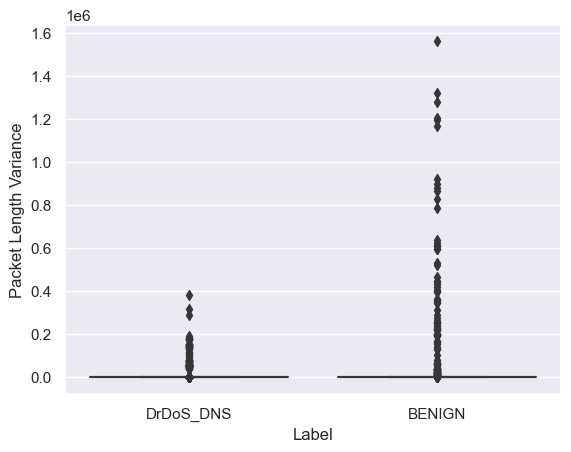

In [12]:
ax = sns.boxplot(data = df,
                x = 'Label',
                y = 'Packet Length Variance',
                palette = 'colorblind')

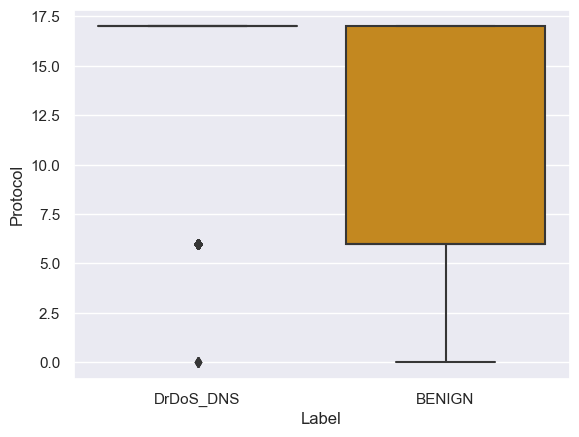

In [13]:
ax = sns.boxplot(data = df,
                x = 'Label',
                y = 'Protocol',
                palette = 'colorblind')

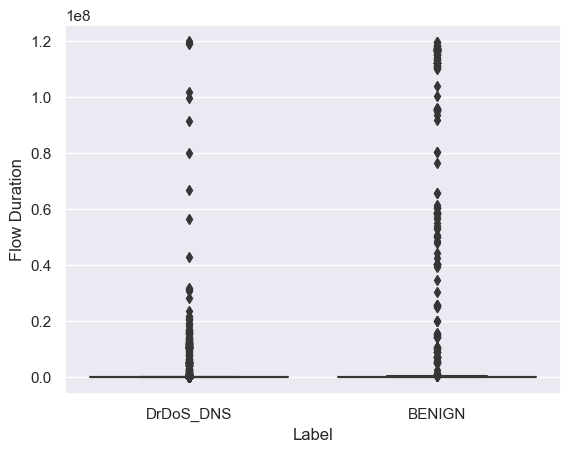

In [16]:
ax = sns.boxplot(data = df,
                x = 'Label',
                y = 'Flow Duration',
                palette = 'colorblind') # Relatively Similar

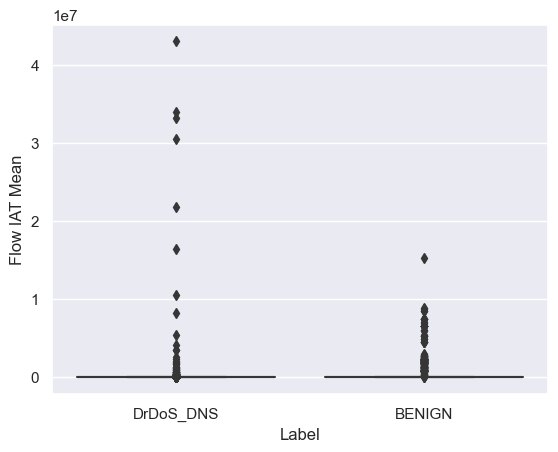

In [18]:
ax = sns.boxplot(data = df,
                x = 'Label',
                y = 'Flow IAT Mean',
                palette = 'colorblind') # Malicious traffic shows some higher outliers

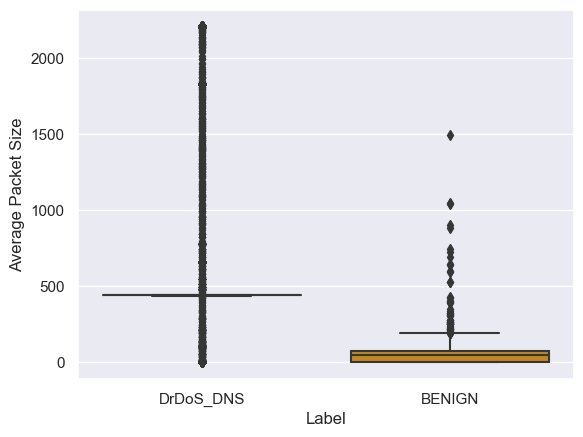

In [19]:
ax = sns.boxplot(data = df,
                x = 'Label',
                y = 'Average Packet Size',
                palette = 'colorblind') 
# Packet Size of Malicious data is very diverse but benign data could be as well, there is just more data represented to support the former

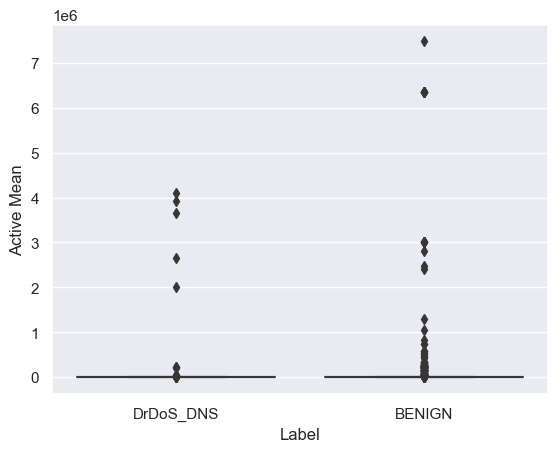

In [20]:
ax = sns.boxplot(data = df,
                x = 'Label',
                y = 'Active Mean',
                palette = 'colorblind')

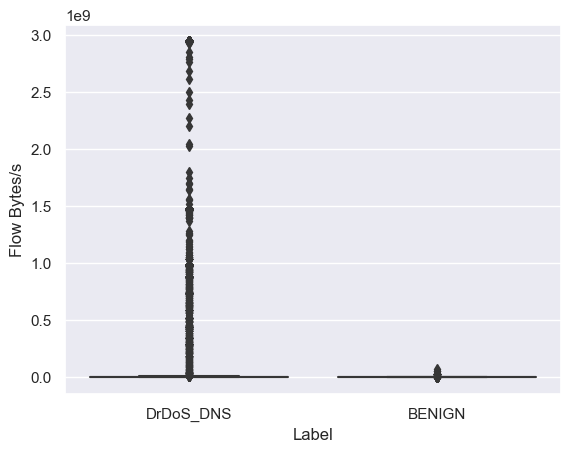

In [21]:
ax = sns.boxplot(data = df,
                x = 'Label',
                y = 'Flow Bytes/s',
                palette = 'colorblind')

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming 'df' is your DataFrame with features and labels
# Select features and labels
X = df.drop(['Unnamed: 0', 'Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'SimillarHTTP', 'Label'], axis=1)
y = df['Label']

# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Fill NaN values with the mean of each column
X_filled = X.fillna(X.mean())

# Check for infinite values
mask = np.isfinite(X_filled)
X_filled[~mask] = np.nan 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_encoded, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = dict(zip(np.unique(y_train), len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))))
print("Class Weight: ", class_weights)
print("\n")
# Initialize Decision Tree Classifier with class weights
clf = DecisionTreeClassifier(random_state=42, class_weight=class_weights)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Decode predictions back to original labels if needed
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Class Weight:  {0: 5.745689655172414, 1: 0.547658175842235}


Accuracy: 1.00

Confusion Matrix:
[[ 183    0]
 [   1 1816]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       183
           1       1.00      1.00      1.00      1817

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

